# [Getting Started with Qiskit](https://qiskit.org/documentation/getting_started.html)

In [1]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'11': 504, '00': 496}


┌───┐     ┌─┐   
q_0: |0>┤ H ├──■──┤M├───
        └───┘┌─┴─┐└╥┘┌─┐
q_1: |0>─────┤ X ├─╫─┤M├
             └───┘ ║ └╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═

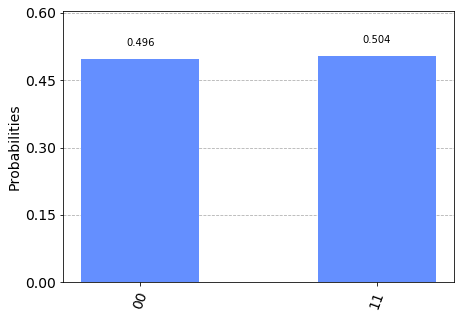

In [2]:
# Plot a histogram
plot_histogram(counts)

# [Basic Qiskit Syntax](https://qiskit.org/textbook/ch-prerequisites/qiskit.html)

In [3]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import noise

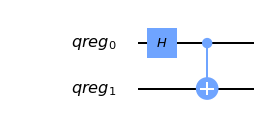

In [4]:
qc = QuantumCircuit()

qr = QuantumRegister(2, 'qreg')
qc.add_register( qr )

qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.draw(output='mpl')

In [5]:
vector_sim = Aer.get_backend('statevector_simulator')
job = execute(qc, vector_sim)
ket = job.result().get_statevector()
for amplitude in ket:
    print(amplitude)

(0.7071067811865476+0j)
0j
0j
(0.7071067811865475+0j)


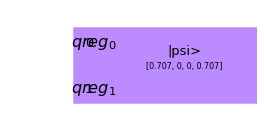

In [6]:
new_qc = QuantumCircuit(qr)
new_qc.initialize(ket, qr)
new_qc.draw(output='mpl')

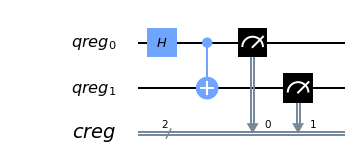

In [7]:
cr = ClassicalRegister(2, 'creg')
qc.add_register(cr)

qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])

qc.draw(output='mpl')

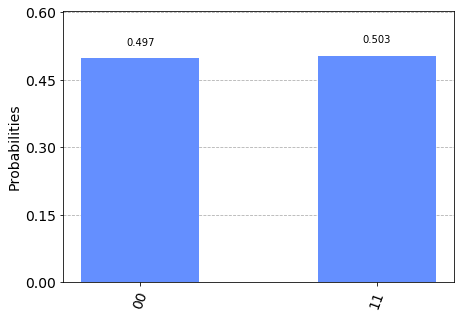

In [8]:
emulator = Aer.get_backend('qasm_simulator')
job = execute(qc, emulator, shots=8192)

hist = job.result().get_counts()
plot_histogram(hist)

In [9]:
job = execute(qc, emulator, shots=10, memory=True)
samples = job.result().get_memory()
print(samples)

['11', '11', '00', '00', '11', '00', '00', '00', '11', '11']


In [10]:
qubit = QuantumRegister(8)
bit = ClassicalRegister(8)
circuit = QuantumCircuit(qubit, bit)

circuit.x(qubit[7])
circuit.measure(qubit, bit)

execute(circuit, emulator, shots=8192).result().get_counts()

{'10000000': 8192}

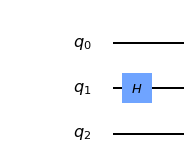

In [11]:
qc = QuantumCircuit(3)
qc.h(1)

qc.draw(output='mpl')

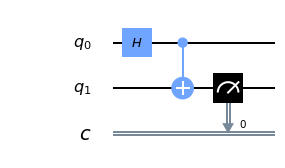

In [12]:
qc = QuantumCircuit(2, 1)

qc.h(0)
qc.cx(0,1)
qc.measure(1,0)

qc.draw('mpl')

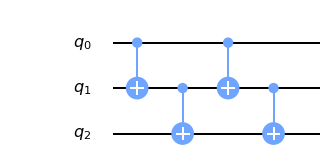

In [13]:
sub_circuit = QuantumCircuit(3, name='toggle_cx')
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)

sub_circuit.draw(output='mpl')

In [14]:
toggle_cx = sub_circuit.to_instruction()

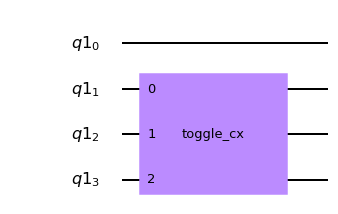

In [15]:
qr = QuantumRegister(4)
new_qc = QuantumCircuit(qr)

new_qc.append(toggle_cx, qr[1:4])

new_qc.draw(output='mpl')

In [16]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [17]:
provider = IBMQ.get_provider(hub='ibm-q')
real_device = provider.get_backend('ibmq_16_melbourne')

In [18]:
properties = real_device.properties()
coupling_map = real_device.configuration().coupling_map

In [19]:
noise_model = noise.NoiseModel.from_backend(properties)

In [20]:
qc = QuantumCircuit(2,2)
qc.x(1)
qc.measure(0,0)
qc.measure(1,1)

job = execute(qc, emulator, shots=1024, noise_model=noise_model,
             coupling_map=coupling_map,
             basis_gates=noise_model.basis_gates)

job.result().get_counts()

{'11': 4, '00': 400, '01': 2, '10': 618}